In [76]:
import matplotlib.pyplot as plt
import numpy as np
import csv

rank = 20

In [77]:
def sorted_weights(base_id):
    file_name = f"log/wfedavg_log_base{base_id}.csv"
    log_f = open(file_name, "r")
    print(file_name)
    reader = csv.reader(log_f)
    data = []
    for row in reader:
        data.append(row)
    weights = data[0]
    float_weights = [[] for _ in range(len(weights))]
    for i, wei in enumerate(weights):
        f_wei = wei[1:-1]
        f_wei = f_wei.split(",")
        f_wei = list(map(float, f_wei))
        for w in f_wei:
            float_weights[i].append(w)
    array_data = np.array(float_weights)
    rewards = np.array([list(map(float, data[1]))])
    rewards = rewards.T
    array_data = np.hstack([array_data, rewards])
    array_data = array_data[np.argsort(array_data[:,-1])]
    array_data = np.flip(array_data, 0)

    plot_data = np.delete(array_data, -1, 1)
    return plot_data

log/wfedavg_log_base0.csv
log/wfedavg_log_base1.csv
log/wfedavg_log_base2.csv
log/wfedavg_log_base3.csv


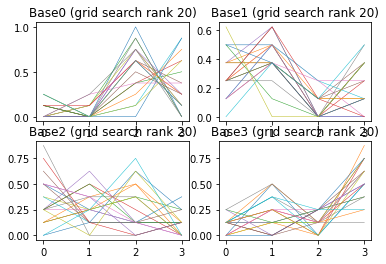

In [79]:
for base in range(4):
    plt.subplot(f"22{base+1}")
    plot_data = sorted_weights(base)
    for i in range(rank):
        plt.xticks([0,1,2,3])
        plt.plot(plot_data[i], linewidth=0.5)
    plt.title(f"Base{base} (grid search rank {rank})")
plt.show()